#### Total OM amount check

We check model data files produced by the biogeochemical model with parameters established in the previous notebook.

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
ds = xr.open_dataset('data/different_porosities_3/3_po82-21_di10e-9/water.nc')
growth_phy = ds['B_BIO_GrowthPhy'].to_dataframe()
growth_phy = growth_phy.loc['2011-01-01':'2011-12-31'].reset_index()

In [3]:
foo, phy0 = growth_phy.groupby('z').get_group(growth_phy['z'][0]).sum()
foo, phy1 = growth_phy.groupby('z').get_group(growth_phy['z'][1]).sum()
foo, phy2 = growth_phy.groupby('z').get_group(growth_phy['z'][2]).sum()
foo, phy3 = growth_phy.groupby('z').get_group(growth_phy['z'][3]).sum()

In [4]:
phy0 = phy0*0.05
phy1 = phy1*0.05
phy2 = phy2*1.15
phy3 = phy3*1.25

According to Beusekom (1999) OM production should match approximately 309000 mg m$^{-2}$ year$^{-1}$:

In [5]:
phy = phy0+phy1+phy2+phy3
phy

304772.746875

In [6]:
time_array = growth_phy.groupby('z').get_group(growth_phy['z'][3]).time.values

In [7]:
B_BIO_GrowthPhy_array = growth_phy.groupby('z').get_group(growth_phy['z'][3]).B_BIO_GrowthPhy.values

Plot primary production in the surface layer:

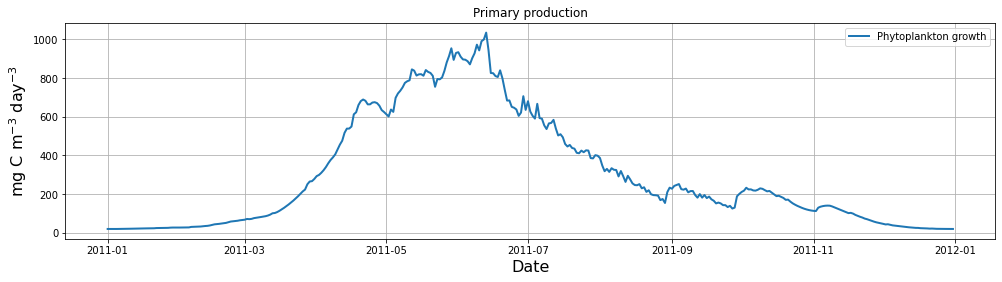

In [8]:
fig = plt.figure(figsize=(14, 4)); ax = fig.add_subplot(1, 1, 1) # row-col-num
ax.plot(time_array, B_BIO_GrowthPhy_array, linewidth=2, label='Phytoplankton growth')
ax.set_title('Primary production'); ax.set_ylabel('mg C m$^{-3}$ day$^{-3}$', fontsize=16)
ax.set_xlabel('Date', fontsize=16); ax.legend(loc='best')
ax.grid(True); fig.tight_layout(pad=1)

#### Marerials

Below we provide the names of all state and diagnostic variables used by the modeling setup.

In [9]:
import src.results_output as ro

In [10]:
ds = xr.open_dataset('data/results/5_po75-25_di10e-9/water.nc')
df = ds.to_dataframe()

In [11]:
df.columns.values

array(['ice_gravity_drainage', 'bioturbation_diffusivity',
       'molecular_diffusivity', 'turbulence', 'tortuosity_on_interfaces',
       'porosity_factor_solids_2', 'porosity_factor_solutes_2',
       'porosity_on_interfaces', 'porosity_factor_solids_1',
       'porosity_factor_solutes_1', 'porosity', 'sigma', 'salinity',
       'temperature', 'layer_thicknesses', 'middle_layer_depths',
       'levelface', 'B_NUT_NH4', 'B_NUT_NH4 _flux', 'B_NUT_NO2',
       'B_NUT_NO2 _flux', 'B_NUT_NO3', 'B_NUT_NO3 _flux', 'B_NUT_PO4',
       'B_NUT_PO4 _flux', 'B_NUT_Si', 'B_NUT_Si  _flux', 'B_C_DIC',
       'B_C_DIC   _flux', 'B_C_Alk', 'B_C_Alk   _flux', 'B_BIO_Phy',
       'B_BIO_Phy _flux', 'B_BIO_Het', 'B_BIO_Het _flux', 'B_BIO_POM',
       'B_BIO_POM _flux', 'B_BIO_DOM', 'B_BIO_DOM _flux', 'B_BIO_O2',
       'B_BIO_O2  _flux', 'B_S_H2S', 'B_S_H2S   _flux', 'B_S_S0',
       'B_S_S0    _flux', 'B_S_S2O3', 'B_S_S2O3  _flux', 'B_S_SO4',
       'B_S_SO4   _flux', 'B_pH_pH', 'B_pH_Hplus', 'B_C_pCO

There are several model outputs with configuration files in the data folder available.
To check the profiles of the state variables one can use the names provided above and a function provided below.
Just put the name into the corresponding input parameter 'name'.
Changing the path one can also check model outputs for different model setups.

<Figure size 432x288 with 0 Axes>

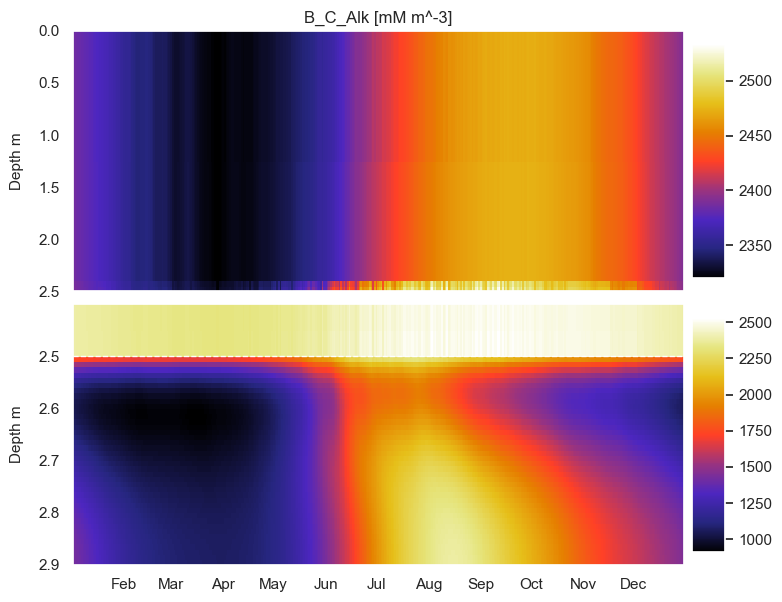

In [12]:
ro.plot_fig(start_year=2010,stop_year=2011,name='B_C_Alk',title='B_C_Alk',
            path='data/results/5_po75-25_di10e-9/')